In [ ]:
from pymatgen.core import Structure
structure = Structure.from_file("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/Structures/structures/AEN.cif")
structure_supercell = structure.make_supercell([2,2,2])

TEST Skalierung des MinMaxScalers

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/DFT_Data_clean_06_10.csv")

data["MinMaxZw"] = data["density_bulk"].multiply(data["volume_kubAng"], axis=0)
data["MinMaxPred"] = data["MinMaxZw"].multiply(data["volume_kubAng"], axis=0).multiply(data["fraction_of_used_points"], axis=0)
data["DevMinMaxPred"] = (data["beladung_atoms"].subtract(data["MinMaxPred"], axis=0)).div(data["beladung_atoms"], axis=0)*100
data_fil = data[data["pressure_bar"]==0.1]
data_fil.head()

betaVext vs -betaVext

In [7]:
# Packages

import pandas as pd
import pickle
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import shutil
import re
from scipy.spatial import distance

N_BINS=100
VEXT_MIN=-15
VEXT_MAX=10
VEXT_MIN_neg=-10
VEXT_MAX_neg=15

file_path1 = "/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/Vext_allTEMP/Vext_500/Vext_EON_500.pkl"
file_path2 = "/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/Vext_allTEMP/Vext_500/Vext_MWW_500.pkl"

with open(file_path1, "rb") as f:
    data = pickle.load(f)

with open(file_path2, "rb") as f:
    doto = pickle.load(f)

arr1 = np.asarray(data, dtype=np.float64).squeeze()
arr1 = arr1[np.isfinite(arr1)]
arr2 = np.asarray(doto, dtype=np.float64).squeeze()
arr2 = arr2[np.isfinite(arr2)]  # NaN/Inf entfernen

hist1, edges1 = np.histogram(arr1, bins=N_BINS, range=(VEXT_MIN, VEXT_MAX))
hist2, edges1 = np.histogram(arr2, bins=N_BINS, range=(VEXT_MIN, VEXT_MAX))

p1 = hist1 / np.sum(hist1)
p2 = hist2 / np.sum(hist2)

hist11, edges11 = np.histogram((-arr1), bins=N_BINS, range=(VEXT_MIN_neg, VEXT_MAX_neg))
hist22, edges22 = np.histogram((-arr2), bins=N_BINS, range=(VEXT_MIN_neg, VEXT_MAX_neg))

p1_neg = hist11 / np.sum(hist11)
p2_neg = hist22 / np.sum(hist22)



In [ ]:

def compute_distances(p1, p2):
    return {
        "Euclidean": distance.euclidean(p1, p2),
        "Cityblock (L1)": distance.cityblock(p1, p2),
        "Bray-Curtis": distance.braycurtis(p1, p2),
        "Cosine": distance.cosine(p1, p2),
        "Canberra": distance.canberra(p1, p2),
        "Correlation": distance.correlation(p1, p2),
        "Chebyshev": distance.chebyshev(p1, p2)
    }

dist_pos = compute_distances(p1, p2)
dist_neg = compute_distances(p1_neg, p2_neg)

print(" Distanzen der Original-Histogramme (arr1 vs arr2):")
for k, v in dist_pos.items():
    print(f"{k:18s}: {v:.6f}")

print(" Distanzen der negierten Histogramme (-arr1 vs -arr2):")
for k, v in dist_neg.items():
    print(f"{k:18s}: {v:.6f}")

print(" Vergleich (negiert - original):")
for k in dist_pos.keys():
    ratio = dist_neg[k] / dist_pos[k] if dist_pos[k] != 0 else np.nan
    print(f"{k:18s}: {ratio:.3f}x")

 Distanzen der Original-Histogramme (arr1 vs arr2):
Euclidean         : 0.054539
Cityblock (L1)    : 0.153839
Bray-Curtis       : 0.076920
Cosine            : 0.000413
Canberra          : 21.280653
Correlation       : 0.000396
Chebyshev         : 0.048828
 Distanzen der negierten Histogramme (-arr1 vs -arr2):
Euclidean         : 0.054539
Cityblock (L1)    : 0.153839
Bray-Curtis       : 0.076920
Cosine            : 0.000413
Canberra          : 21.280653
Correlation       : 0.000396
Chebyshev         : 0.048828
 Vergleich (negiert - original):
Euclidean         : 1.000x
Cityblock (L1)    : 1.000x
Bray-Curtis       : 1.000x
Cosine            : 1.000x
Canberra          : 1.000x
Correlation       : 1.000x
Chebyshev         : 1.000x


In [30]:
import pandas as pd 
import os
import numpy as np
DFT_PATH = "/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/DFT_Data_clean_64grid_kond.csv"
VEXT_FILE = "/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/Vext_allcsv/Vext_allTEMP_64grid_20b.csv"  # <<< HIER ändern
LOG_PATH = "/Users/danielbock/MASTERTHESIS/MASTA/Results/BO_log_SINGLE_20b.csv"
temperatures = [300., 350., 400., 450., 500.]
pressures = [1., 8.07142857, 15.14285714, 22.21428571, 29.28571429,
             36.35714286, 43.42857143, 50.5, 57.57142857, 64.64285714,
             71.71428571, 78.78571429, 85.85714286, 92.92857143, 100.]


In [36]:
dft_data = pd.read_csv(DFT_PATH)
dft_data = dft_data.drop(columns=[col for col in dft_data.columns if col.startswith("bin_")])
print(dft_data)
dft_data.to_csv("dft_fckin_clean_kond_64grid.csv")
expV_data = pd.read_csv(VEXT_FILE)
expV_data = expV_data[expV_data["temperature_kelvin"].isin(temperatures)]
print(dft_data)
# Log vorbereiten
#cols = ["vext_file", "temperature", "pressure", "best_value", "true_best_value", "iterations", "n_data"]
if not os.path.exists(LOG_PATH):
    pd.DataFrame(columns=cols).to_csv(LOG_PATH, index=False)

# --- BO SINGLE ---
for T in temperatures:
    for P in pressures:   
        data = pd.merge(dft_data, expV_data, 'inner', on=["structure_name", "temperature_kelvin"])
        if data.empty:
            continue

        feature_cols = [c for c in data.columns if "bin_" in c]
        if not feature_cols:
            continue
        #print(data[feature_cols])

       structure_name  pressure_bar  temperature_kelvin  volume_kubAng  \
0                 DDR           1.0               300.0    6715.860313   
1                 RRO           1.0               300.0    1007.699890   
2                 MER           1.0               300.0    1954.329977   
3                 EOS           1.0               300.0     682.685342   
4                 CFI           1.0               300.0    1908.333111   
...               ...           ...                 ...            ...   
152267            LIO         100.0               500.0    2041.797373   
152268            SVV         100.0               500.0    3106.520566   
152269            PUN         100.0               500.0    2405.249497   
152270            FER         100.0               500.0    2051.260998   
152271            JSW         100.0               500.0    2606.215205   

         grid.dv  density_Atmos_per_kubAng      density_bulk  \
0       0.025619                661.466342  [2.

In [17]:
df

array([300., 350., 400., 450., 500.])

In [18]:
do

array([400, 650, 725, 575, 325, 300, 550, 700, 675, 425, 450, 600, 525,
       375, 350, 500, 750, 625, 475])

In [19]:
de

array([  1.        ,   8.07142857,  15.14285714,  22.21428571,
        29.28571429,  36.35714286,  43.42857143,  50.5       ,
        57.57142857,  64.64285714,  71.71428571,  78.78571429,
        85.85714286,  92.92857143, 100.        ])

In [57]:
import pandas as pd
import glob

file_list = glob.glob('/Users/danielbock/MASTERTHESIS/MASTA/TestBench/bo_log_*.csv')

df_list = []
for file in file_list:
    df = pd.read_csv(file)
    #df['source_file'] = os.path.basename(file)  # Optional: Herkunft speichern
    df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

# Optional: Nach Timestamp sortieren (falls vorhanden)
if 'timestamp' in merged_df.columns:
    merged_df = merged_df.sort_values(by='timestamp')

# Gesamtdatei speichern
output_file = '/Users/danielbock/MASTERTHESIS/MASTA/TestBench/bo_log_merged.csv'
merged_df.to_csv(output_file, index=False)

In [59]:
data = pd.read_csv('/Users/danielbock/MASTERTHESIS/MASTA/TestBench/bo_log_merged.csv')
data=data[data["found_global_best"]==True]
data

,timestamp,temperature_kelvin,pressure_bar,n_candidates,n_iterations,best_value,global_best_value,found_global_best,vext_str,note
0,2025-10-26T16:48:11,300.0,0.100000,245,20,0.002411,0.002411,True,NaN,NaN
1,2025-10-26T16:48:11,300.0,0.100000,245,20,0.002411,0.002411,True,NaN,NaN
2,2025-10-26T16:48:13,300.0,1.000000,245,15,0.004751,0.004751,True,NaN,NaN
3,2025-10-26T16:48:13,300.0,1.000000,245,15,0.004751,0.004751,True,NaN,NaN
4,2025-10-26T16:48:18,325.0,0.100000,245,27,0.001568,0.001568,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1271,2025-10-27T21:15:52,500.0,85.857143,127,10,0.003318,0.003318,True,25b_exp,NaN
1272,2025-10-27T21:15:54,500.0,92.928571,127,10,0.003346,0.003346,True,25b_exp,NaN
1273,2025-10-27T21:15:54,500.0,92.928571,127,10,0.003346,0.003346,True,25b_exp,NaN
1274,2025-10-27T21:15:57,500.0,100.000000,127,10,0.003370,0.003370,True,25b_exp,NaN


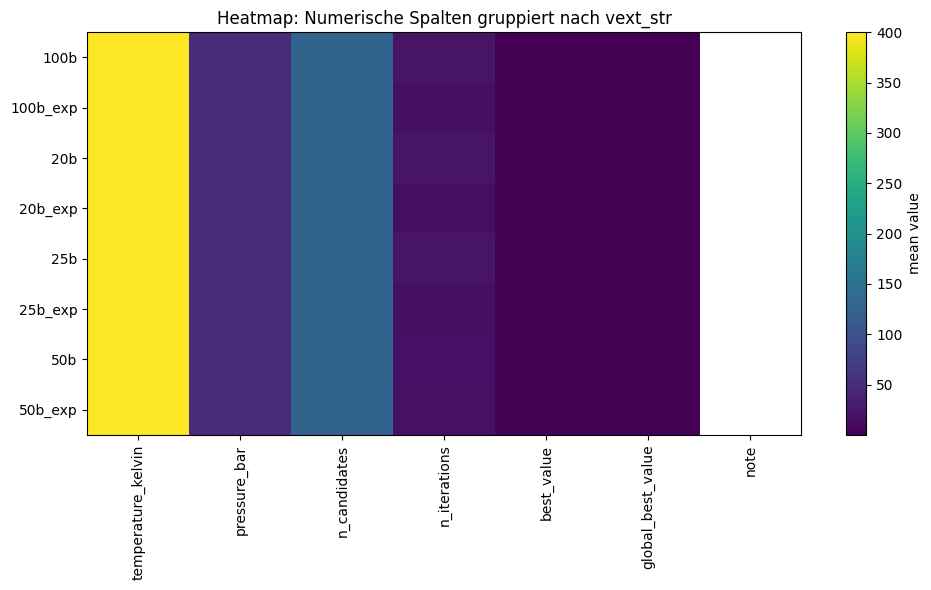

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv("bo_log_merged.csv")

# Prüfen ob vext_str existiert
if "vext_str" not in df.columns:
    raise ValueError("Spalte 'vext_str' nicht gefunden!")

# Numerische Spalten auswählen
numeric_cols = df.select_dtypes(include='number').columns

# Mittelwerte nach Version berechnen
heatmap_data = df.groupby("vext_str")[numeric_cols].mean()

# Optional: Heatmap kompakter machen (z.B. nur Top 10 Versionen & 10 Spalten)
heatmap_data = heatmap_data.head(10).iloc[:, :10]

# Heatmap plotten
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, aspect='auto')
plt.colorbar(label="mean value")
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=90)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.title("Heatmap: Numerische Spalten gruppiert nach vext_str")
plt.tight_layout()
plt.show()
